# PROBLEM 1

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cz=pd.read_csv('cubic_zirconia.csv')

In [3]:
cz.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
cz.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
cz.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
cz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
cz.mean()

carat       0.798375
depth      61.745147
table      57.456080
x           5.729854
y           5.733569
z           3.538057
price    3939.518115
dtype: float64

In [8]:
cz.std()

carat       0.477745
depth       1.412860
table       2.232068
x           1.128516
y           1.166058
z           0.720624
price    4024.864666
dtype: float64

In [9]:
cz.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [10]:
cz.var()

carat    2.282407e-01
depth    1.996174e+00
table    4.982127e+00
x        1.273549e+00
y        1.359690e+00
z        5.192984e-01
price    1.619954e+07
dtype: float64

In [11]:
cz.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [12]:
cz.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


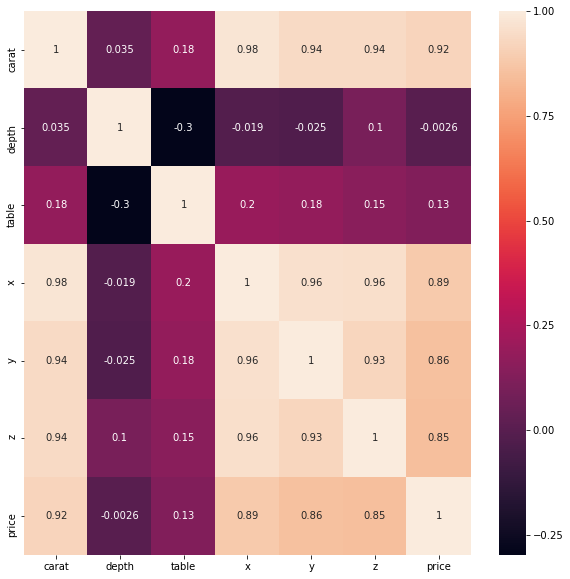

In [13]:
plt.subplots(figsize=(10,10))
sns.heatmap(cz.corr(), annot=True)

In [14]:
cz.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
cz.shape

(26967, 10)

In [16]:
#Duplicate records
dups = cz.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
cz[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [17]:
cz.drop_duplicates(inplace=True)
cz.shape

(26933, 10)

In [18]:
for column in cz.columns:
    if cz[column].dtype == 'object':
        print(column.upper(),': ',cz[column].nunique())
        print(cz[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [19]:
#Imputing null values
for column in cz.columns:
    if cz[column].dtype != 'object':
        mean = cz[column].mean()
        cz[column] = cz[column].fillna(mean)    
        
cz.isnull().sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [20]:
#Minimum of x,y and z before imputing zero
cz[['carat','depth','table','x','y','z']].min()

carat     0.2
depth    50.8
table    49.0
x         0.0
y         0.0
z         0.0
dtype: float64

In [21]:
#Imputing zero values
cz['x']=cz['x'].replace(0, cz['x'].mean())
cz['y']=cz['y'].replace(0, cz['y'].mean())
cz['z']=cz['z'].replace(0, cz['z'].mean())

In [22]:
#Minimum of x,y and z after imputing zero
cz[['carat','depth','table','x','y','z']].min()

carat     0.20
depth    50.80
table    49.00
x         3.73
y         3.71
z         1.07
dtype: float64

In [23]:
#IQR before scaling
cz.quantile(q=0.75,axis=0) - cz.quantile(q=0.25,axis=0)

carat       0.65
depth       1.40
table       3.00
x           1.84
y           1.82
z           1.14
price    4411.00
dtype: float64

In [24]:
cz.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.745285,57.455950,5.729772,5.733528,3.538820,3937.526120
std,0.477237,NaN,NaN,NaN,1.393848,2.232156,1.126285,1.163989,0.717377,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


# Univariate Analysis

(array([1.2466e+04, 7.9000e+03, 3.4190e+03, 2.0330e+03, 9.9800e+02,
        9.6000e+01, 1.3000e+01, 4.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([0.2 , 0.63, 1.06, 1.49, 1.92, 2.35, 2.78, 3.21, 3.64, 4.07, 4.5 ]),
 <a list of 10 Patch objects>)

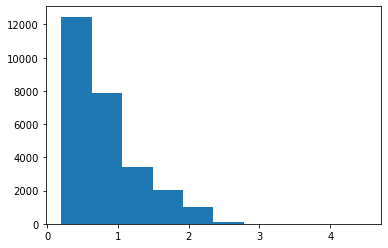

In [25]:
plt.hist(cz['carat'])

(array([10805.,     0.,  6886.,     0.,     0.,  6027.,     0.,  2435.,
            0.,   780.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

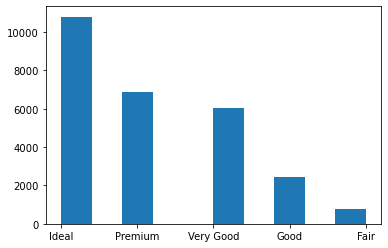

In [26]:
plt.hist(cz['cut'])

(array([4916., 5653.,    0., 4723.,    0., 3341., 4095.,    0., 1440.,
        2765.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

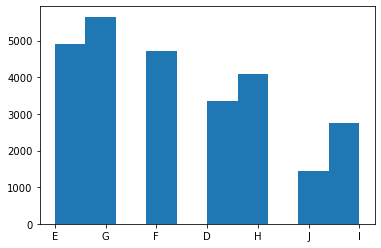

In [27]:
plt.hist(cz['color'])

(array([6565.,  891., 2530.,    0., 4087., 1839.,    0., 6093., 4564.,
         364.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

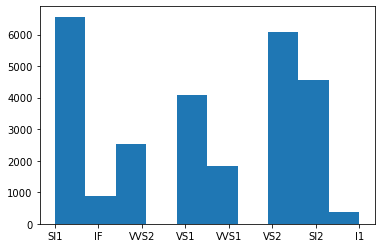

In [28]:
plt.hist(cz['clarity'])

(array([3.0000e+00, 1.7000e+01, 1.6400e+02, 2.2390e+03, 1.4723e+04,
        9.1760e+03, 4.9800e+02, 9.3000e+01, 1.6000e+01, 4.0000e+00]),
 array([50.8 , 53.08, 55.36, 57.64, 59.92, 62.2 , 64.48, 66.76, 69.04,
        71.32, 73.6 ]),
 <a list of 10 Patch objects>)

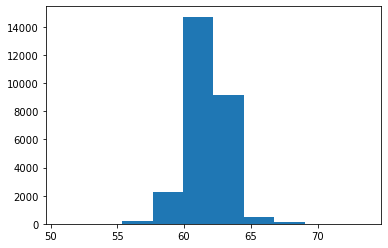

In [29]:
plt.hist(cz['depth'])

(array([9.0000e+00, 1.7680e+03, 1.3072e+04, 9.7050e+03, 2.0690e+03,
        2.5800e+02, 4.5000e+01, 5.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([49., 52., 55., 58., 61., 64., 67., 70., 73., 76., 79.]),
 <a list of 10 Patch objects>)

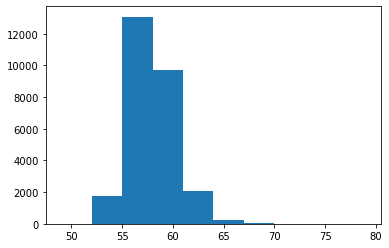

In [30]:
plt.hist(cz['table'])

(array([3160., 5806., 4298., 4426., 5471., 2345., 1052.,  352.,   17.,
           6.]),
 array([ 3.73,  4.38,  5.03,  5.68,  6.33,  6.98,  7.63,  8.28,  8.93,
         9.58, 10.23]),
 <a list of 10 Patch objects>)

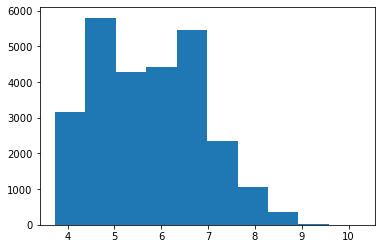

In [31]:
plt.hist(cz['x'])

(array([2.692e+04, 1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 3.71 ,  9.229, 14.748, 20.267, 25.786, 31.305, 36.824, 42.343,
        47.862, 53.381, 58.9  ]),
 <a list of 10 Patch objects>)

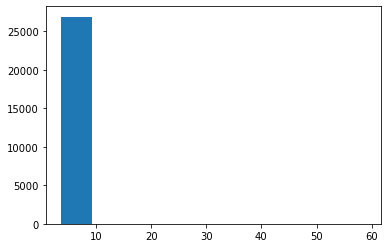

In [32]:
plt.hist(cz['y'])

(array([2.1597e+04, 5.3340e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.07 ,  4.143,  7.216, 10.289, 13.362, 16.435, 19.508, 22.581,
        25.654, 28.727, 31.8  ]),
 <a list of 10 Patch objects>)

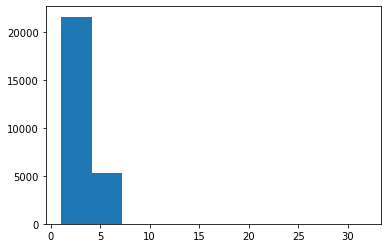

In [33]:
plt.hist(cz['z'])

(array([12750.,  4587.,  3637.,  1937.,  1173.,   864.,   655.,   499.,
          446.,   385.]),
 array([  326. ,  2175.2,  4024.4,  5873.6,  7722.8,  9572. , 11421.2,
        13270.4, 15119.6, 16968.8, 18818. ]),
 <a list of 10 Patch objects>)

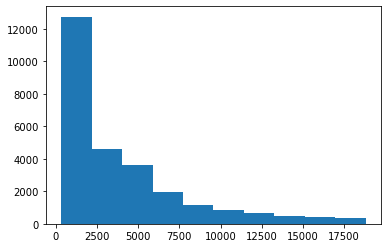

In [34]:
plt.hist(cz['price'])

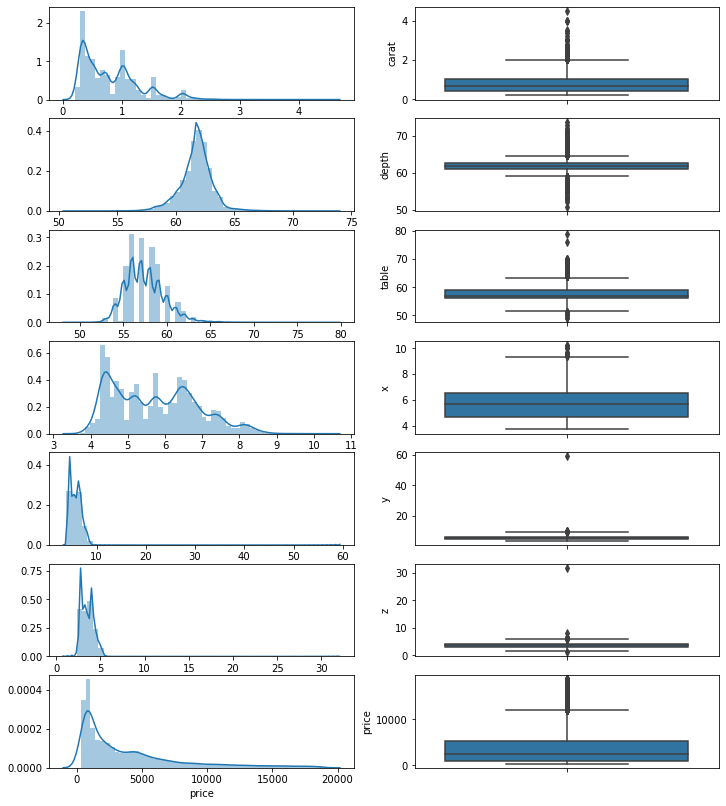

In [35]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(cz['carat'] , ax=axes[0][0])
a = sns.boxplot(cz['carat'] , orient = "v" , ax=axes[0][1])

a = sns.distplot(cz['depth'] , ax=axes[1][0])
a = sns.boxplot(cz['depth'] , orient = "v" , ax=axes[1][1])

a = sns.distplot(cz['table'] , ax=axes[2][0])
a = sns.boxplot(cz['table'] , orient = "v" , ax=axes[2][1])

a = sns.distplot(cz['x'] , ax=axes[3][0])
a = sns.boxplot(cz['x'] , orient = "v" , ax=axes[3][1])

a = sns.distplot(cz['y'] , ax=axes[4][0])
a = sns.boxplot(cz['y'] , orient = "v" , ax=axes[4][1])

a = sns.distplot(cz['z'] , ax=axes[5][0])
a = sns.boxplot(cz['z'] , orient = "v" , ax=axes[5][1])

a = sns.distplot(cz['price'] , ax=axes[6][0])
a = sns.boxplot(cz['price'] , orient = "v" , ax=axes[6][1])

plt.show()

# Bivariate Analysis

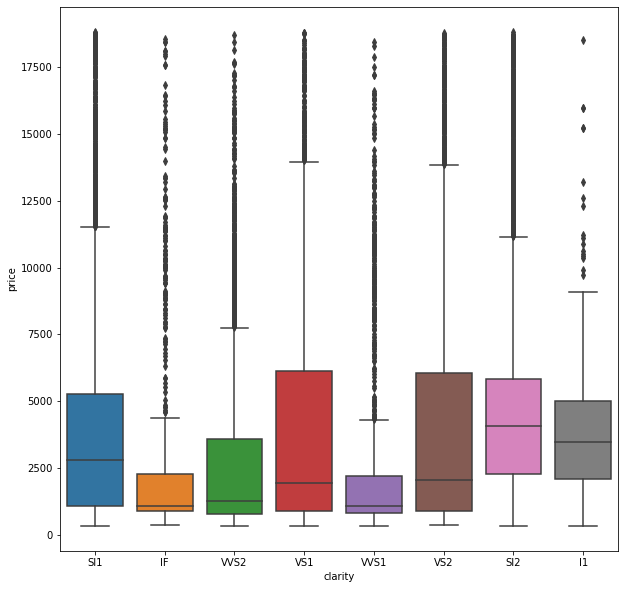

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(cz['clarity'],cz['price'])

In [37]:
cz['price'].groupby(cz['cut']).mean()

cut
Fair         4568.096154
Good         3926.336756
Ideal        3454.820639
Premium      4544.558525
Very Good    4032.267961
Name: price, dtype: float64

In [38]:
cz['price'].groupby(cz['color']).mean()

color
D    3184.827597
E    3073.940399
F    3699.944527
G    4005.046170
H    4477.932112
I    5124.816637
J    5329.706250
Name: price, dtype: float64

In [39]:
cz['price'].groupby(cz['clarity']).mean()

clarity
I1      3908.750000
IF      2739.534231
SI1     3998.635644
SI2     5088.869413
VS1     3838.752386
VS2     3965.496964
VVS1    2502.874388
VVS2    3263.042688
Name: price, dtype: float64

In [40]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_1 =cz.pivot_table(index=['cut','color'], 
                      values=['price'],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_1)

                       price
cut       color             
Fair      D      4515.500000
          E      4156.730000
          F      4050.209459
          G      4218.755102
          H      5341.536913
          I      4817.212766
          J      5073.529412
Good      D      3508.893891
          E      3284.453061
          F      3535.898455
          G      4239.538278
          H      4059.658120
          I      5085.154762
          J      4873.087500
Ideal     D      2518.020582
          E      2618.787386
          F      3334.418297
          G      3763.497361
          H      3876.133548
          I      4500.284250
          J      4903.353201
Premium   D      3665.514888
          E      3468.714651
          F      4323.662371
          G      4448.418083
          H      5172.401208
          I      5846.026874
          J      6327.985185
Very Good D      3660.998650
          E      3259.383642
          F      3688.394564
          G      3843.262565
          H   

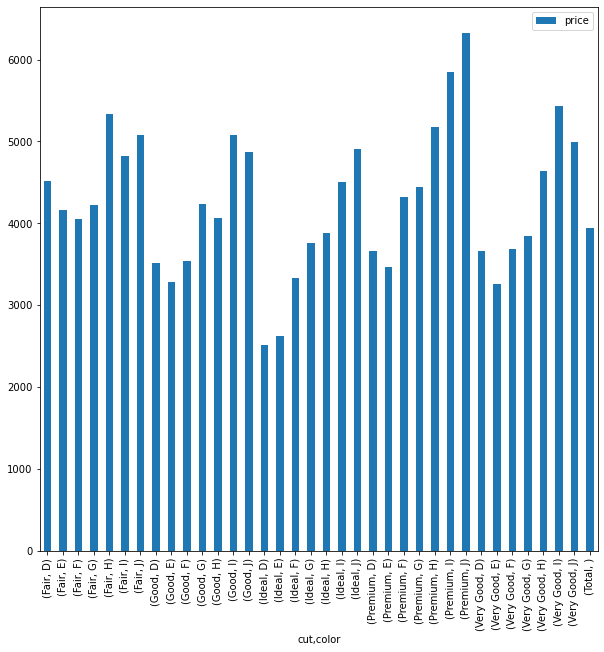

In [41]:
ax=pv_1.plot(kind='bar',figsize=(10,10))

In [42]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_2 =cz.pivot_table(index=['cut','clarity'], 
                      values=['price'],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_2)

                         price
cut       clarity             
Fair      I1       3554.483146
          IF       1995.750000
          SI1      4243.466321
          SI2      5589.339286
          VS1      4566.301075
          VS2      4542.356589
          VVS1     2977.300000
          VVS2     3352.078947
Good      I1       3818.120000
          IF       3901.400000
          SI1      3710.079843
          SI2      4398.402277
          VS1      3906.948485
          VS2      4371.873727
          VVS1     2378.500000
          VVS2     2982.447552
Ideal     I1       3949.594595
          IF       2182.224590
          SI1      3706.145387
          SI2      4808.833082
          VS1      3485.268950
          VS2      3342.847645
          VVS1     2407.009653
          VVS2     3242.023718
Premium   I1       4082.685185
          IF       3552.469565
          SI1      4422.235489
          SI2      5529.618850
          VS1      4379.066265
          VS2      4496.720024
        

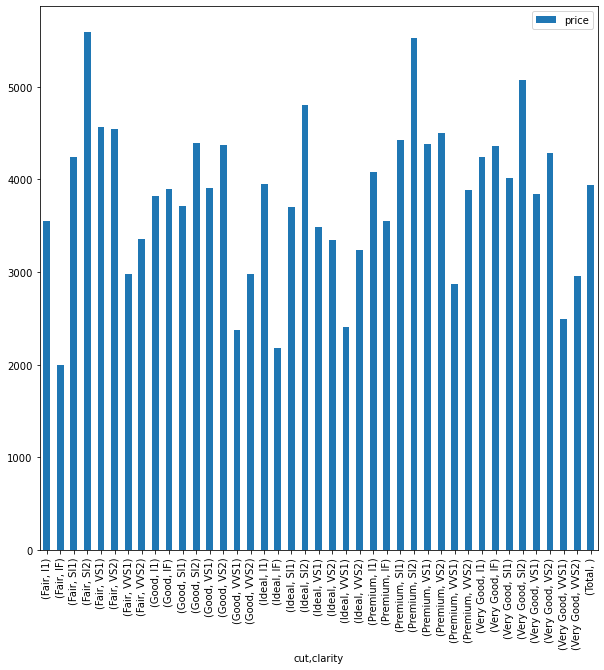

In [43]:
ax1=pv_2.plot(kind='bar',figsize=(10,10))

In [44]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_3 =cz.pivot_table(index=['color','clarity'], 
                      values=['price'],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_3)

                     price
color clarity             
D     I1       3500.920000
      IF       6821.868421
      SI1      3068.424447
      SI2      4010.322870
      VS1      3062.813008
      VS2      2584.588308
      VVS1     2680.462810
      VVS2     3225.481884
E     I1       3416.792453
      IF       3203.149425
      SI1      3091.525220
      SI2      4248.641932
      VS1      2895.830400
      VS2      2746.836938
      VVS1     2181.339181
      VVS2     2604.528487
F     I1       3455.358209
      IF       3013.846154
      SI1      3801.268382
      SI2      4464.388000
      VS1      3520.940476
      VS2      3776.939421
      VVS1     2829.100000
      VVS2     3311.034137
G     I1       3345.426471
      IF       2502.305882
      SI1      3677.478958
      SI2      4924.151671
      VS1      4176.197955
      VS2      4517.668050
      VVS1     2939.861933
      VVS2     3866.740088
H     I1       4663.268293
      IF       1836.040268
      SI1      4996.839038
 

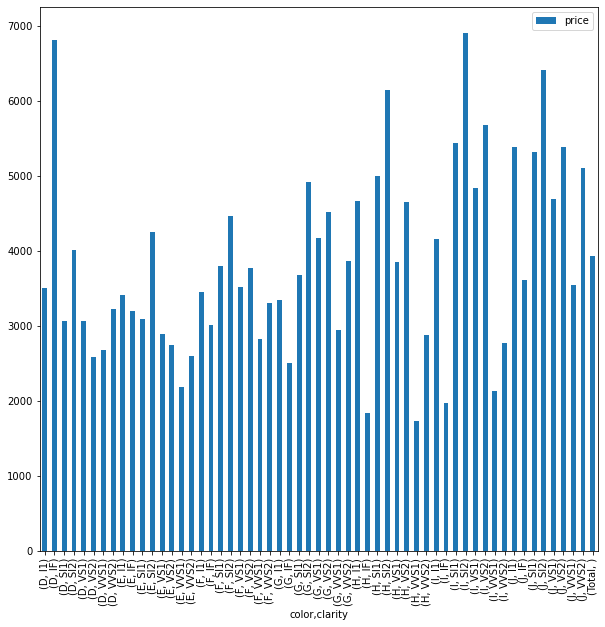

In [45]:
ax2=pv_3.plot(kind='bar',figsize=(10,10))

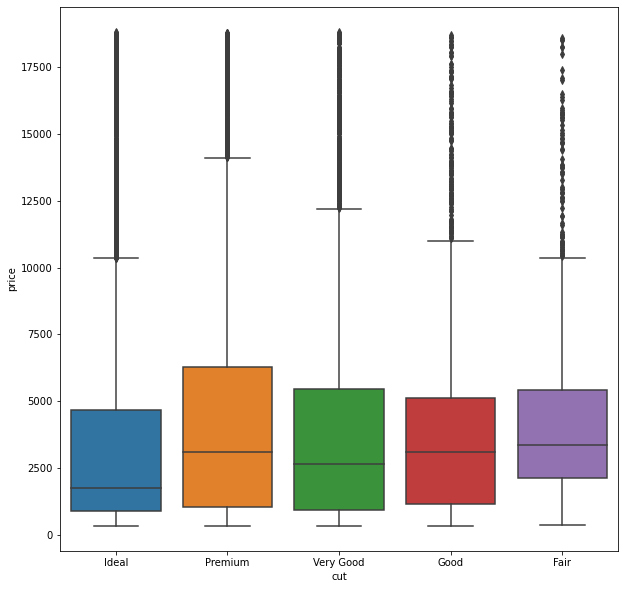

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(cz['cut'],cz['price'])

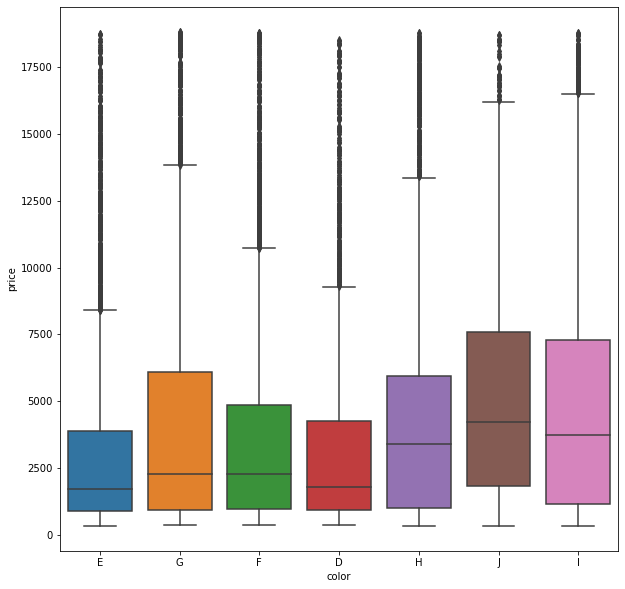

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(cz['color'],cz['price'])

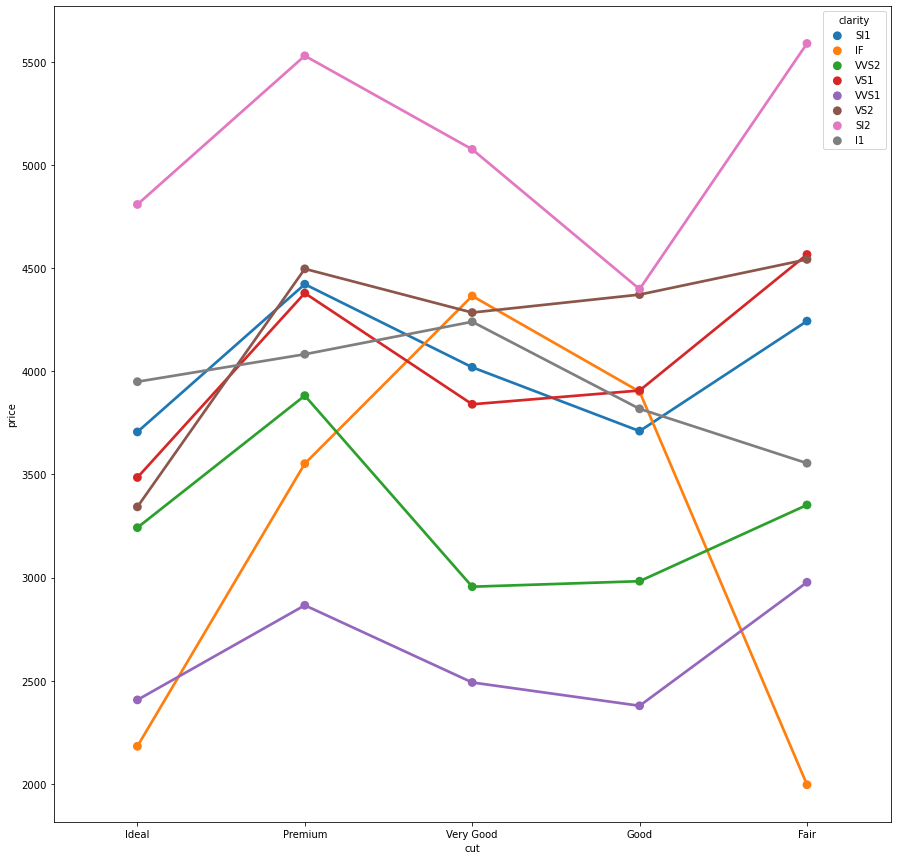

In [48]:
plt.figure(figsize=(15,15))
sns.pointplot(x='cut', y='price', hue='clarity', data=cz,ci=None)

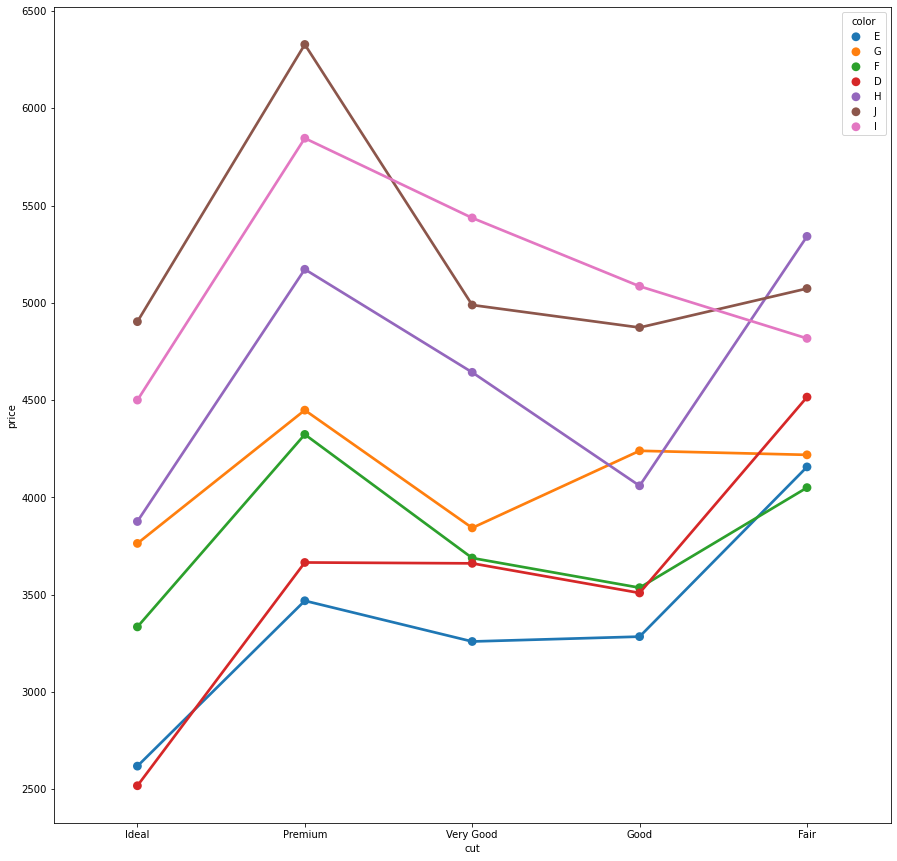

In [49]:
plt.figure(figsize=(15,15))
sns.pointplot(x='cut', y='price', hue='color', data=cz,ci=None)

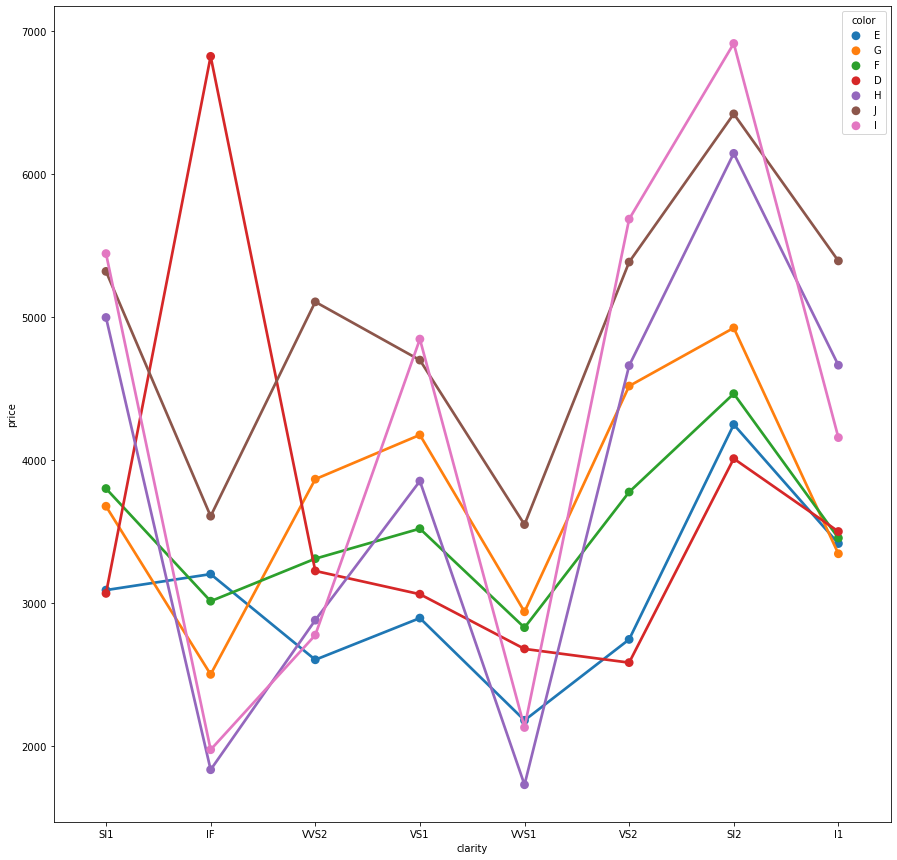

In [50]:
plt.figure(figsize=(15,15))
sns.pointplot(x='clarity', y='price', hue='color', data=cz,ci=None)

# Multivariate Analysis

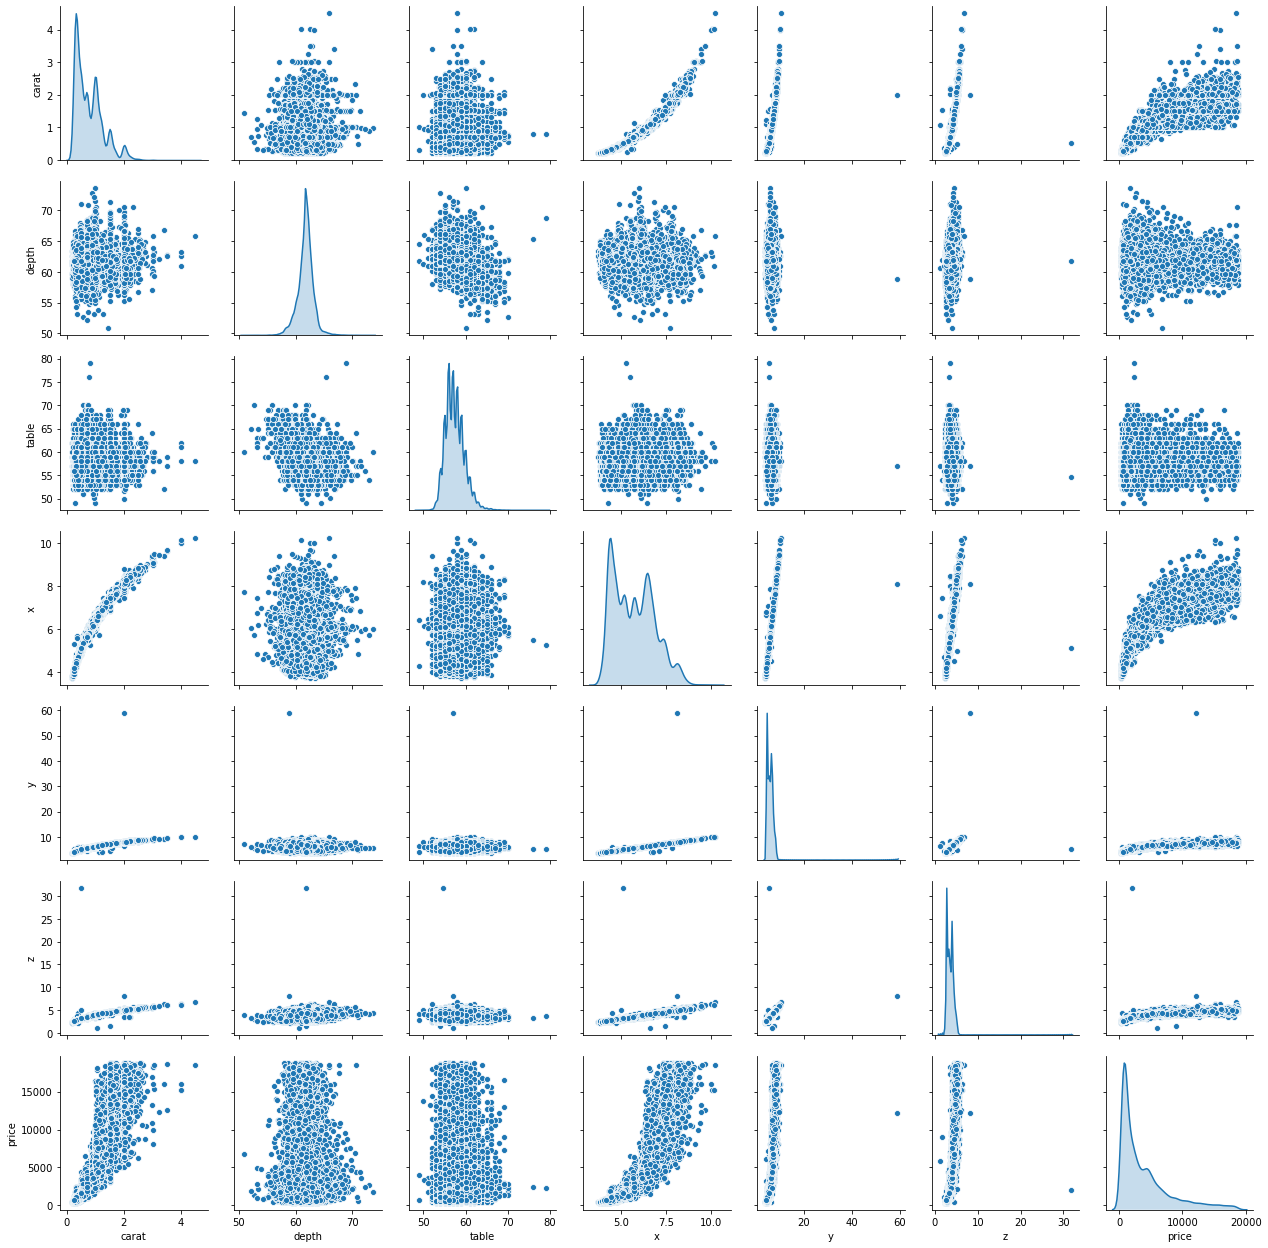

In [51]:
sns.pairplot(cz,diag_kind = 'kde')

In [52]:
czc=cz.copy()

In [53]:
#Converting all objects to categorical codes
for feature in cz.columns: 
    if cz[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(cz[feature].unique()))
        print(pd.Categorical(cz[feature].unique()).codes)
        cz[feature] = pd.Categorical(cz[feature]).codes



feature: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


feature: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


feature: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


In [54]:
cz.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [55]:
cz.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,2.554895,2.605206,3.834330,61.745285,57.455950,5.729772,5.733528,3.538820,3937.526120
std,0.477237,1.024287,1.705883,1.725078,1.393848,2.232156,1.126285,1.163989,0.717377,4022.551862
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,3.000000,4.000000,5.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,4.000000,6.000000,7.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [56]:
cz.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.020445,0.293894,-0.212006,0.034741,0.181539,0.977897,0.942387,0.946331,0.922409
cut,0.020445,1.000000,-0.000527,0.017167,-0.184448,0.144093,0.024042,0.029155,0.006410,0.039342
color,0.293894,-0.000527,1.000000,-0.023551,0.050130,0.024124,0.274309,0.264461,0.268916,0.172883
clarity,-0.212006,0.017167,-0.023551,1.000000,-0.052652,-0.079786,-0.225219,-0.214221,-0.221604,-0.069767
depth,0.034741,-0.184448,0.050130,-0.052652,1.000000,-0.293720,-0.018418,-0.024409,0.097018,-0.002855
table,0.181539,0.144093,0.024124,-0.079786,-0.293720,1.000000,0.197465,0.183507,0.150955,0.126844
x,0.977897,0.024042,0.274309,-0.225219,-0.018418,0.197465,1.000000,0.962532,0.960693,0.887435
y,0.942387,0.029155,0.264461,-0.214221,-0.024409,0.183507,0.962532,1.000000,0.932700,0.857241
z,0.946331,0.006410,0.268916,-0.221604,0.097018,0.150955,0.960693,0.932700,1.000000,0.855314
price,0.922409,0.039342,0.172883,-0.069767,-0.002855,0.126844,0.887435,0.857241,0.855314,1.000000


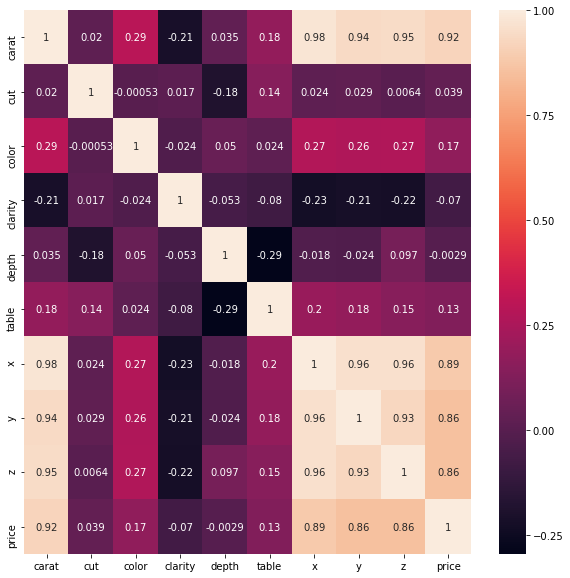

In [57]:
plt.subplots(figsize=(10,10))
sns.heatmap(cz.corr(), annot=True)

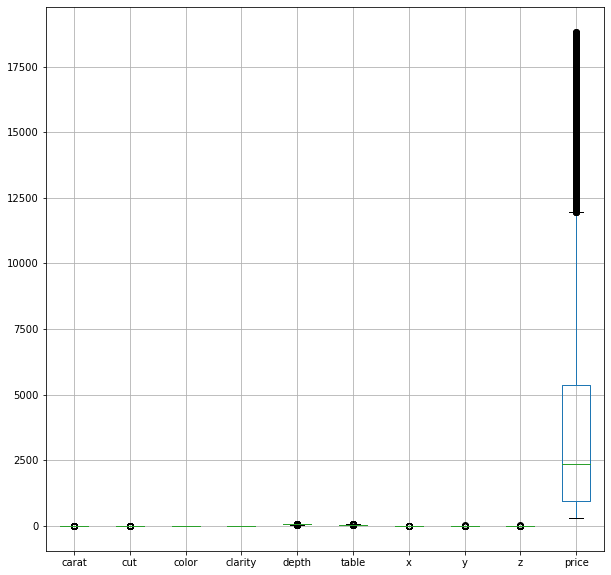

In [58]:
plt.subplots(figsize=(10,10))
cz.boxplot(figsize=(10,10))

In [59]:
cz_c=cz.copy()

In [60]:
cz_c['Volume']=cz['x']*cz['y']*cz['z']

In [61]:
cz_c.drop(['x','y','z'],axis=1,inplace=True)

In [62]:
cz_c.head(5)

,carat,cut,color,clarity,depth,table,price,Volume
0,0.30,2,1,2,62.1,58.0,499,48.726678
1,0.33,3,3,1,60.8,58.0,984,53.225640
2,0.90,4,1,7,62.2,60.0,6289,139.726944
3,0.42,2,2,4,61.6,56.0,1082,68.482560
4,0.31,2,2,6,60.4,59.0,779,51.066825


In [63]:
cz_c.corr()

,carat,cut,color,clarity,depth,table,price,Volume
carat,1.000000,0.020445,0.293894,-0.212006,0.034741,0.181539,0.922409,0.960935
cut,0.020445,1.000000,-0.000527,0.017167,-0.184448,0.144093,0.039342,0.024713
color,0.293894,-0.000527,1.000000,-0.023551,0.050130,0.024124,0.172883,0.282077
clarity,-0.212006,0.017167,-0.023551,1.000000,-0.052652,-0.079786,-0.069767,-0.201374
depth,0.034741,-0.184448,0.050130,-0.052652,1.000000,-0.293720,-0.002855,0.013486
table,0.181539,0.144093,0.024124,-0.079786,-0.293720,1.000000,0.126844,0.164022
price,0.922409,0.039342,0.172883,-0.069767,-0.002855,0.126844,1.000000,0.888762
Volume,0.960935,0.024713,0.282077,-0.201374,0.013486,0.164022,0.888762,1.000000


In [64]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [65]:
lcarat,ucarat=remove_outlier(cz['carat'])
cz['carat']=np.where(cz['carat']>ucarat,ucarat,cz['carat'])
cz['carat']=np.where(cz['carat']<lcarat,lcarat,cz['carat'])

lrdepth,urdepth=remove_outlier(cz['depth'])
cz['depth']=np.where(cz['depth']>urdepth,urdepth,cz['depth'])
cz['depth']=np.where(cz['depth']<lrdepth,lrdepth,cz['depth'])

lrtable,urtable=remove_outlier(cz['table'])
cz['table']=np.where(cz['table']>urtable,urtable,cz['table'])
cz['table']=np.where(cz['table']<lrtable,lrtable,cz['table'])

lrlen,urlen=remove_outlier(cz['x'])
cz['x']=np.where(cz['x']>urlen,urlen,cz['x'])
cz['x']=np.where(cz['x']<lrlen,lrlen,cz['x'])

lrwidth,urwidth=remove_outlier(cz['y'])
cz['y']=np.where(cz['y']>urwidth,urwidth,cz['y'])
cz['y']=np.where(cz['y']<lrwidth,lrwidth,cz['y'])

lrheight,urheight=remove_outlier(cz['z'])
cz['z']=np.where(cz['z']>urheight,urheight,cz['z'])
cz['z']=np.where(cz['z']<lrheight,lrheight,cz['z'])

lrprice,urprice=remove_outlier(cz['price'])
cz['price']=np.where(cz['price']>urprice,urprice,cz['price'])
cz['price']=np.where(cz['price']<lrprice,lrprice,cz['price'])

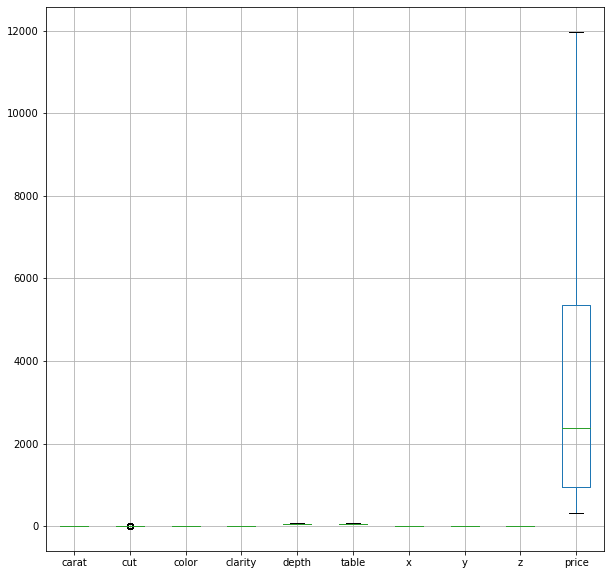

In [66]:
plt.subplots(figsize=(10,10))
cz.boxplot(figsize=(10,10))

In [67]:
# All variables must be on same scale, hence we can omit scaling.
# Standardization


from scipy.stats import zscore
cz_scale=cz.apply(zscore)
cz_scale.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067471,-0.541748,-0.940999,-1.063351,0.288026,0.261676,-1.296638,-1.289794,-1.261746,-0.933304
1,-1.002552,0.434559,0.231435,-1.643046,-0.778877,0.261676,-1.163386,-1.137688,-1.204239,-0.793460
2,0.230898,1.410866,-0.940999,1.835122,0.370095,1.188856,0.275740,0.347581,0.348458,0.736177
3,-0.807797,-0.541748,-0.354782,0.096038,-0.122321,-0.665503,-0.808046,-0.833477,-0.830441,-0.765203
4,-1.045831,-0.541748,-0.354782,1.255428,-1.107154,0.725266,-1.225570,-1.164531,-1.276123,-0.852569


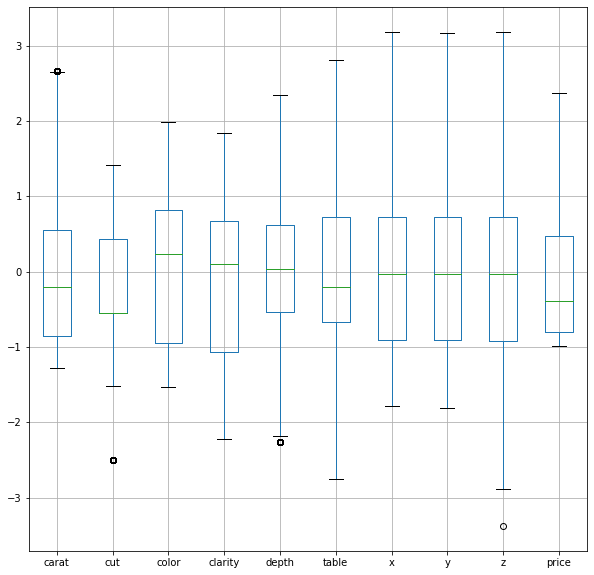

In [68]:
plt.subplots(figsize=(10,10))
cz_scale.boxplot(figsize=(10,10))

In [69]:
cz_scale.drop(["price"],axis=1,inplace=True)

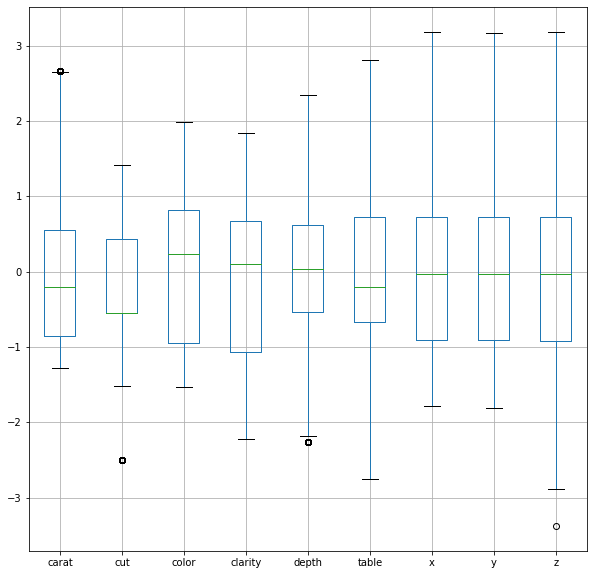

In [70]:
plt.subplots(figsize=(10,10))
cz_scale.boxplot(figsize=(15,10))

In [71]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(cz_scale.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00003713e+00  2.21282821e-02  2.91709794e-01 -2.11214131e-01
   2.93993668e-02  1.87150121e-01  9.82905995e-01  9.81988025e-01
   9.80499258e-01]
 [ 2.21282821e-02  1.00003713e+00 -5.26943631e-04  1.71675837e-02
  -1.85132889e-01  1.69599470e-01  2.40824486e-02  2.96721888e-02
   4.76784319e-03]
 [ 2.91709794e-01 -5.26943631e-04  1.00003713e+00 -2.35523594e-02
   5.13240525e-02  2.39124502e-02  2.74237191e-01  2.73866396e-01
   2.78303315e-01]
 [-2.11214131e-01  1.71675837e-02 -2.35523594e-02  1.00003713e+00
  -4.96870803e-02 -8.12328842e-02 -2.25060181e-01 -2.22047799e-01
  -2.28244120e-01]
 [ 2.93993668e-02 -1.85132889e-01  5.13240525e-02 -4.96870803e-02
   1.00003713e+00 -2.89376089e-01 -1.99259280e-02 -2.29620204e-02
   9.48572561e-02]
 [ 1.87150121e-01  1.69599470e-01  2.39124502e-02 -8.12328842e-02
  -2.89376089e-01  1.00003713e+00  1.99650358e-01  1.94017299e-01
   1.60469782e-01]
 [ 9.82905995e-01  2.40824486e-02  2.74237191e-01 -2.25060181e-01
  -1.9

In [72]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)



 Eigen Values 
 %s [4.17235765e+00 1.43021479e+00 9.87805224e-01 8.65932178e-01
 8.40201031e-01 6.75799963e-01 2.33436841e-02 3.22954546e-03
 1.45010824e-03]
Eigen Vectors 
 %s [[ 4.82085650e-01 -2.76976438e-02  3.08024657e-02 -8.27530680e-02
  -7.50826484e-02 -1.12191646e-02  8.67461523e-01 -2.09100159e-02
  -1.84230330e-02]
 [ 1.75307355e-02  4.98697108e-01  1.71716761e-01  5.49149522e-01
  -6.47959044e-01  7.75019376e-03 -3.42270550e-03 -1.15464524e-04
   4.39408746e-03]
 [ 1.72538283e-01 -1.11753739e-01  5.54241320e-01  5.80479523e-01
   5.56909193e-01 -5.64682205e-02 -1.62853639e-02  2.65437233e-05
   4.94422327e-05]
 [-1.39528345e-01  4.27990027e-02  7.99096638e-01 -5.11363447e-01
  -1.89908181e-01  2.06008713e-01 -1.19750014e-02  2.00860539e-04
   1.98161113e-03]
 [ 5.51475227e-03 -6.35661041e-01 -4.31769530e-02  2.50516480e-01
  -2.80212838e-01  6.66072614e-01 -1.13212758e-02  9.47562707e-02
  -1.72884173e-03]
 [ 1.18381063e-01  5.71603141e-01 -1.46928467e-01 -6.17497410e-02
 

In [73]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 46.35780814  62.24849358  73.22369966  82.84481107  92.18003146
  99.68864114  99.94800578  99.98388828 100.        ]


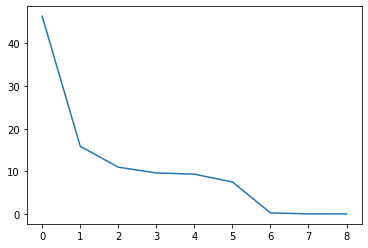

In [74]:
plt.plot(var_exp)

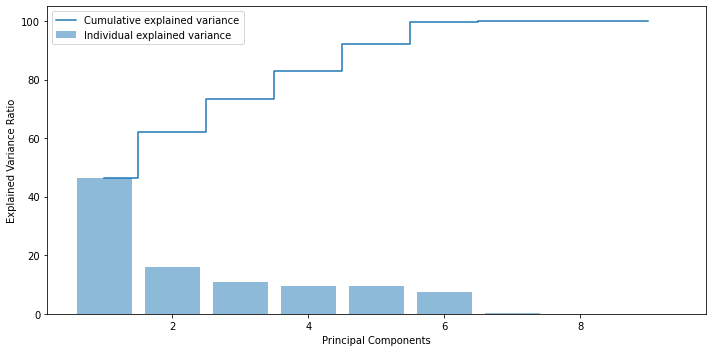

In [75]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [76]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(cz_scale)
data_reduced.transpose()

array([[-2.36972625, -1.87783313,  0.33111031, ..., -1.28423683,
        -2.89639286,  2.51939522],
       [ 0.12497356, -0.8786137 , -1.30041123, ..., -0.58046063,
        -0.54179825,  0.13471468],
       [ 1.58954788,  1.18323489, -1.01410241, ..., -0.02038853,
        -1.52913215, -0.34446907],
       [-0.20317516, -1.41010594,  0.79936781, ...,  0.48055406,
        -0.15644207, -1.60118824],
       [ 0.42959328,  0.82850094, -1.55810262, ..., -0.65532436,
        -1.30056888,  0.74120526],
       [ 0.33715619, -0.56701442,  1.50222105, ...,  0.4095649 ,
         0.10154962, -0.10935723]])

In [77]:
pca.components_

array([[ 4.82085650e-01,  1.75307355e-02,  1.72538283e-01,
        -1.39528345e-01,  5.51475227e-03,  1.18381063e-01,
         4.85229308e-01,  4.84825767e-01,  4.83218881e-01],
       [ 2.76976438e-02, -4.98697108e-01,  1.11753739e-01,
        -4.27990027e-02,  6.35661041e-01, -5.71603141e-01,
        -6.95243957e-04, -1.89872436e-03,  7.35811396e-02],
       [-3.08024657e-02, -1.71716761e-01, -5.54241320e-01,
        -7.99096638e-01,  4.31769530e-02,  1.46928467e-01,
        -1.03990692e-02, -1.45452974e-02, -7.33172441e-03],
       [ 8.27530680e-02, -5.49149522e-01, -5.80479523e-01,
         5.11363447e-01, -2.50516480e-01,  6.17497410e-02,
         1.03432348e-01,  1.02271884e-01,  7.35415161e-02],
       [-7.50826484e-02, -6.47959044e-01,  5.56909193e-01,
        -1.89908181e-01, -2.80212838e-01,  3.60357761e-01,
        -6.56862587e-02, -7.22139658e-02, -1.01942220e-01],
       [-1.12191646e-02,  7.75019376e-03, -5.64682205e-02,
         2.06008713e-01,  6.66072614e-01,  7.098600

In [78]:
pca.explained_variance_ratio_

array([0.46357808, 0.15890685, 0.10975206, 0.09621111, 0.0933522 ,
       0.0750861 ])

In [79]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([46.4, 62.3, 73.3, 82.9, 92.2, 99.7])

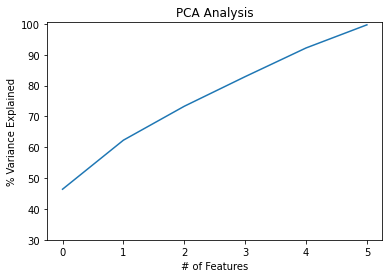

In [80]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [81]:
cz_comp = pd.DataFrame(pca.components_,columns=list(cz_scale))
cz_comp.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.482086,0.017531,0.172538,-0.139528,0.005515,0.118381,0.485229,0.484826,0.483219
1,0.027698,-0.498697,0.111754,-0.042799,0.635661,-0.571603,-0.000695,-0.001899,0.073581
2,-0.030802,-0.171717,-0.554241,-0.799097,0.043177,0.146928,-0.010399,-0.014545,-0.007332
3,0.082753,-0.549150,-0.580480,0.511363,-0.250516,0.061750,0.103432,0.102272,0.073542
4,-0.075083,-0.647959,0.556909,-0.189908,-0.280213,0.360358,-0.065686,-0.072214,-0.101942


In [82]:
cz.drop(['x','y','z'],axis=1,inplace=True)

In [83]:
czc['Volume']=czc['x']*czc['y']*czc['z']
czc.drop(['x','y','z'],axis=1,inplace=True)

In [84]:
czc.head()

,carat,cut,color,clarity,depth,table,price,Volume
0,0.30,Ideal,E,SI1,62.1,58.0,499,48.726678
1,0.33,Premium,G,IF,60.8,58.0,984,53.225640
2,0.90,Very Good,E,VVS2,62.2,60.0,6289,139.726944
3,0.42,Ideal,F,VS1,61.6,56.0,1082,68.482560
4,0.31,Ideal,F,VVS1,60.4,59.0,779,51.066825


In [85]:
czc_1 = pd.get_dummies(czc, columns=['cut','color','clarity'],drop_first=True)
czc_1.head()

,carat,depth,table,price,Volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,499,48.726678,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,984,53.225640,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6289,139.726944,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,1082,68.482560,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,779,51.066825,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
from scipy.stats import zscore
czc_1[['carat','depth','table','Volume','price']]=czc_1[['carat','depth','table','Volume','price']].apply(zscore)
czc_1.head()

,carat,depth,table,price,Volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.254491,0.243737,-0.854828,-1.011735,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.980684,-0.678196,0.243737,-0.734256,-0.955725,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213713,0.326236,1.139749,0.584584,0.121171,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.792095,-0.104235,-0.652274,-0.709892,-0.765785,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022593,-0.965177,0.691743,-0.785219,-0.982601,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
czc_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   price          26933 non-null  float64
 4   Volume         26933 non-null  float64
 5   cut_Good       26933 non-null  uint8  
 6   cut_Ideal      26933 non-null  uint8  
 7   cut_Premium    26933 non-null  uint8  
 8   cut_Very Good  26933 non-null  uint8  
 9   color_E        26933 non-null  uint8  
 10  color_F        26933 non-null  uint8  
 11  color_G        26933 non-null  uint8  
 12  color_H        26933 non-null  uint8  
 13  color_I        26933 non-null  uint8  
 14  color_J        26933 non-null  uint8  
 15  clarity_IF     26933 non-null  uint8  
 16  clarity_SI1    26933 non-null  uint8  
 17  clarity_SI2    26933 non-null  uint8  
 18  clarit

In [88]:
czc_2=czc_1.copy()
czc_2.head()

,carat,depth,table,price,Volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.254491,0.243737,-0.854828,-1.011735,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.980684,-0.678196,0.243737,-0.734256,-0.955725,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213713,0.326236,1.139749,0.584584,0.121171,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.792095,-0.104235,-0.652274,-0.709892,-0.765785,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022593,-0.965177,0.691743,-0.785219,-0.982601,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
czc_2.drop(['Volume'],axis=1,inplace=True)
czc_2.head()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.254491,0.243737,-0.854828,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980684,-0.678196,0.243737,-0.734256,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213713,0.326236,1.139749,0.584584,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.792095,-0.104235,-0.652274,-0.709892,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.022593,-0.965177,0.691743,-0.785219,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Performing Linear Regression without considering Volume

In [90]:
# Copy all the predictor variables into X dataframe
X = czc_2.drop('price', axis=1)

# Copy target into the y dataframe. 
y = czc_2[['price']]

In [91]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0)

In [92]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.058795448367069
The coefficient for depth is -0.010539847229109722
The coefficient for table is -0.01685162403700452
The coefficient for cut_Good is 0.14383689318084075
The coefficient for cut_Ideal is 0.20782666175312497
The coefficient for cut_Premium is 0.18723148891969177
The coefficient for cut_Very Good is 0.18346766328492464
The coefficient for color_E is -0.0506358789413143
The coefficient for color_F is -0.0761206671376082
The coefficient for color_G is -0.1268844860526805
The coefficient for color_H is -0.2423098271931326
The coefficient for color_I is -0.37401660615724786
The coefficient for color_J is -0.5755075458817642
The coefficient for clarity_IF is 1.3664231748994873
The coefficient for clarity_SI1 is 0.9154833073458843
The coefficient for clarity_SI2 is 0.6796156382348042
The coefficient for clarity_VS1 is 1.1498831459209171
The coefficient for clarity_VS2 is 1.0730957597690247
The coefficient for clarity_VVS1 is 1.2849532316732457
The 

In [94]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.0383987213392964


In [95]:
# R square on training data
regression_model.score(X_train, y_train)

0.9167789667428764

In [96]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9183615160472309

In [97]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.28860551384044564

In [98]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.28543549429295456

In [99]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
8747,0.821388,-1.108667,-0.204268,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.442383
13821,-0.917821,-0.534706,-0.652274,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.706909
13582,0.842343,0.971942,0.243737,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.202481
9952,-1.169273,-0.749941,1.139749,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,-0.858308
25530,-0.624461,0.039255,-0.652274,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,-0.468747


In [100]:
data_train.rename(columns = {"cut_Very Good": "cut_VeryGood"}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_VeryGood"}, 
                      inplace = True) 

In [101]:
data_train.columns

Index(['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_VeryGood', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [102]:
expr= 'price ~ carat + depth + table+ cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'

In [103]:
import statsmodels.formula.api as smf
lm = smf.ols(formula= expr, data = data_train).fit()
lm.params

Intercept      -1.038399
carat           1.058795
depth          -0.010540
table          -0.016852
cut_Good        0.143837
cut_Ideal       0.207827
cut_Premium     0.187231
cut_VeryGood    0.183468
color_E        -0.050636
color_F        -0.076121
color_G        -0.126884
color_H        -0.242310
color_I        -0.374017
color_J        -0.575508
clarity_IF      1.366423
clarity_SI1     0.915483
clarity_SI2     0.679616
clarity_VS1     1.149883
clarity_VS2     1.073096
clarity_VVS1    1.284953
clarity_VVS2    1.261742
dtype: float64

In [104]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.037e+04
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:29:42   Log-Likelihood:                -3322.7
No. Observations:               18853   AIC:                             6687.
Df Residuals:                   18832   BIC:                             6852.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0384      0.022    -46.668   

The overall P value is less than alpha, so rejecting H0 and accepting Ha that at least 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [105]:
# Calculate MSE
mse = np.mean((lm.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [106]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2886055138404461

In [107]:
np.sqrt(lm.mse_resid) #another way

0.2887663843566114

In [108]:
# Prediction on Test data
y_pred = lm.predict(data_test)

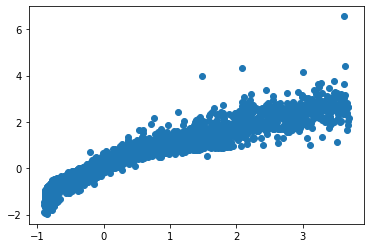

In [109]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [110]:
for i,j in np.array(lm.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1.04) * Intercept + (1.06) * carat + (-0.01) * depth + (-0.02) * table + (0.14) * cut_Good + (0.21) * cut_Ideal + (0.19) * cut_Premium + (0.18) * cut_VeryGood + (-0.05) * color_E + (-0.08) * color_F + (-0.13) * color_G + (-0.24) * color_H + (-0.37) * color_I + (-0.58) * color_J + (1.37) * clarity_IF + (0.92) * clarity_SI1 + (0.68) * clarity_SI2 + (1.15) * clarity_VS1 + (1.07) * clarity_VS2 + (1.28) * clarity_VVS1 + (1.26) * clarity_VVS2 + 

# Conclusion

The final Linear Regression equation is

Without Volume:

price = b0 + b1 * carat + b2 * depth  + b3 * table + b4 * cut_Good  + b5 * cut_Ideal  + b6 * cut_Premium  + b7 * cut_VeryGood  + b8 * color_E  + b9 * color_F  + b10 * color_G  + b11 * color_H +b12 * color_I + b13 * color_J + b14 * clarity_IF   + b15 * clarity_SI1 + b16 * clarity_SI2 +b17 * clarity_VS1 + b18 * clarity_VS2 + b19 * clarity_VVS1 + b20 * clarity_VVS2

price = (-1.04) * Intercept + (1.06) * carat + (-0.01) * depth + (-0.02) * table + (0.14) * cut_Good + (0.21) * cut_Ideal + (0.19) * cut_Premium + (0.18) * cut_VeryGood + (-0.05) * color_E + (-0.08) * color_F + (-0.13) * color_G + (-0.24) * color_H + (-0.37) * color_I + (-0.58) * color_J + (1.37) * clarity_IF + (0.92) * clarity_SI1 + (0.68) * clarity_SI2 + (1.15) * clarity_VS1 + (1.07) * clarity_VS2 + (1.28) * clarity_VVS1 + (1.26) * clarity_VVS2 + 

When carat increases by 1 unit, price increases by 1.06 units, keeping all other predictors constant.


There are also some negative co-efficient values, for instance, color_G has its corresponding co-efficient as -0.13. This implies, when the color is G, the price decreases by 0.13 units, keeping all other predictors constant.


# Performing Linear Regression considering Volume

In [111]:
# Copy all the predictor variables into X dataframe
X = czc_1.drop('price', axis=1)

# Copy target into the y dataframe. 
y = czc_1[['price']]

In [112]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0)

In [113]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 0.878610799986291
The coefficient for depth is -0.006831378845445317
The coefficient for table is -0.013849821527057535
The coefficient for Volume is 0.18743007278844798
The coefficient for cut_Good is 0.1405983500035077
The coefficient for cut_Ideal is 0.20381544786497982
The coefficient for cut_Premium is 0.18304847689431805
The coefficient for cut_Very Good is 0.17885805246003633
The coefficient for color_E is -0.05122233628502479
The coefficient for color_F is -0.07626900124343836
The coefficient for color_G is -0.1270817982521168
The coefficient for color_H is -0.24217495725910726
The coefficient for color_I is -0.37415151493131044
The coefficient for color_J is -0.5758254762576758
The coefficient for clarity_IF is 1.3640268509297506
The coefficient for clarity_SI1 is 0.9128462717522373
The coefficient for clarity_SI2 is 0.6770838864322434
The coefficient for clarity_VS1 is 1.146476462049541
The coefficient for clarity_VS2 is 1.0705681855439648
The coe

In [115]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.031333394824705


In [116]:
# R square on training data
regression_model.score(X_train, y_train)

0.9169945520715617

In [117]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9097615688096392

In [118]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2882314529853463

In [119]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.300093286577428

In [120]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,Volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
8747,0.821388,-1.108667,-0.204268,0.797738,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.442383
13821,-0.917821,-0.534706,-0.652274,-0.874908,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.706909
13582,0.842343,0.971942,0.243737,0.732938,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.202481
9952,-1.169273,-0.749941,1.139749,-1.121779,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,-0.858308
25530,-0.624461,0.039255,-0.652274,-0.579780,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,-0.468747


In [121]:
data_train.rename(columns = {"cut_Very Good": "cut_VeryGood"}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_VeryGood"}, 
                      inplace = True) 

In [122]:
data_train.columns

Index(['carat', 'depth', 'table', 'Volume', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_VeryGood', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [123]:
expr= 'price ~ carat + depth + table+Volume + cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'

In [124]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept      -1.031333
carat           0.878611
depth          -0.006831
table          -0.013850
Volume          0.187430
cut_Good        0.140598
cut_Ideal       0.203815
cut_Premium     0.183048
cut_VeryGood    0.178858
color_E        -0.051222
color_F        -0.076269
color_G        -0.127082
color_H        -0.242175
color_I        -0.374152
color_J        -0.575825
clarity_IF      1.364027
clarity_SI1     0.912846
clarity_SI2     0.677084
clarity_VS1     1.146476
clarity_VS2     1.070568
clarity_VVS1    1.282503
clarity_VVS2    1.259124
dtype: float64

In [125]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     9906.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:29:45   Log-Likelihood:                -3298.3
No. Observations:               18853   AIC:                             6641.
Df Residuals:                   18831   BIC:                             6813.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0313      0.022    -46.362   

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0


In [126]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [127]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2882314529853468

In [128]:
np.sqrt(lm1.mse_resid) #another way

0.2883997722725317

In [129]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

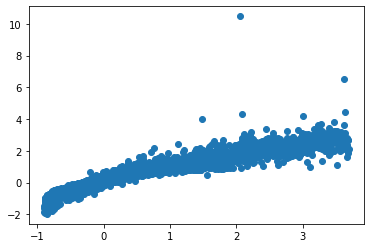

In [130]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [131]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1.03) * Intercept + (0.88) * carat + (-0.01) * depth + (-0.01) * table + (0.19) * Volume + (0.14) * cut_Good + (0.2) * cut_Ideal + (0.18) * cut_Premium + (0.18) * cut_VeryGood + (-0.05) * color_E + (-0.08) * color_F + (-0.13) * color_G + (-0.24) * color_H + (-0.37) * color_I + (-0.58) * color_J + (1.36) * clarity_IF + (0.91) * clarity_SI1 + (0.68) * clarity_SI2 + (1.15) * clarity_VS1 + (1.07) * clarity_VS2 + (1.28) * clarity_VVS1 + (1.26) * clarity_VVS2 + 

# Conclusion

The final Linear Regression equation is

With Volume:

price = b0 + b1 * carat + b2 * depth  + b3 * table + b4 * cut_Good  + b5 * cut_Ideal  + b6 * cut_Premium  + b7 * cut_VeryGood  + b8 * color_E  + b9 * color_F  + b10 * color_G  + b11 * color_H +b12 * color_I + b13 * color_J + b14 * clarity_IF   + b15 * clarity_SI1 + b16 * clarity_SI2 +b17 * clarity_VS1 + b18 * clarity_VS2 + b19 * clarity_VVS1 + b20 * clarity_VVS2 + b21 * Volume

price = (-1.03) * Intercept + (0.88) * carat + (-0.01) * depth + (-0.01) * table + (0.19) * Volume + (0.14) * cut_Good + (0.2) * cut_Ideal + (0.18) * cut_Premium + (0.18) * cut_VeryGood + (-0.05) * color_E + (-0.08) * color_F + (-0.13) * color_G + (-0.24) * color_H + (-0.37) * color_I + (-0.58) * color_J + (1.36) * clarity_IF + (0.91) * clarity_SI1 + (0.68) * clarity_SI2 + (1.15) * clarity_VS1 + (1.07) * clarity_VS2 + (1.28) * clarity_VVS1 + (1.26) * clarity_VVS2

When carat increases by 1 unit, price increases by 0.88 units, keeping all other predictors constant.


There are also some negative co-efficient values, for instance, color_G has its corresponding co-efficient as -0.13. This implies, when the color is G, the price decreases by 0.13 units, keeping all other predictors constant.


# PROBLEM 2

In [132]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn import metrics
%matplotlib inline 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [133]:
hp=pd.read_csv('Holiday_Package.csv')

In [134]:
hp.head(5)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [135]:
hp.drop(['Unnamed: 0'],axis=1,inplace=True)

In [136]:
hp.rename(columns={"Holliday_Package": "Holiday_Package", "foreign": "foreigner"},inplace=True)

In [137]:
hp.head(5)

,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreigner
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [138]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holiday_Package    872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreigner          872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [139]:
hp.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [140]:
hp.mean()

Salary               47729.172018
age                     39.955275
educ                     9.307339
no_young_children        0.311927
no_older_children        0.982798
dtype: float64

In [141]:
hp.std()

Salary               23418.668531
age                     10.551675
educ                     3.036259
no_young_children        0.612870
no_older_children        1.086786
dtype: float64

In [142]:
hp.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [143]:
hp.var()

Salary               5.484340e+08
age                  1.113378e+02
educ                 9.218867e+00
no_young_children    3.756096e-01
no_older_children    1.181104e+00
dtype: float64

In [144]:
hp.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


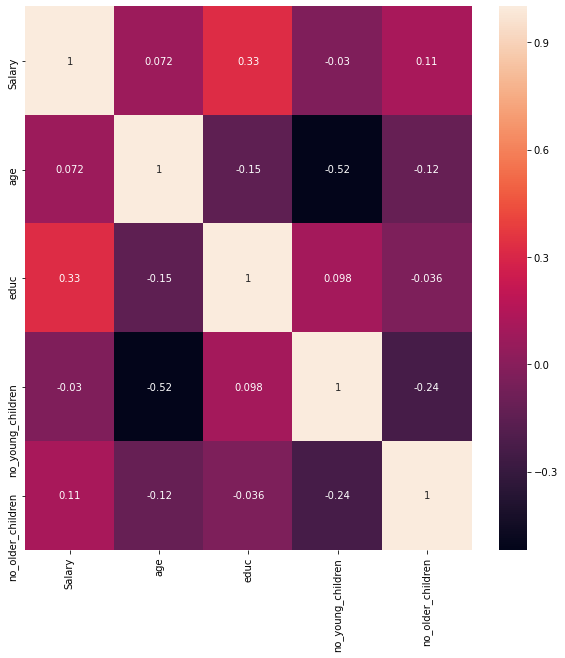

In [145]:
plt.subplots(figsize=(10,10))
sns.heatmap(hp.corr(), annot=True)

In [146]:
hp.isnull().sum()

Holiday_Package      0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreigner            0
dtype: int64

In [147]:
hp.Holiday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holiday_Package, dtype: float64

In [148]:
for feature in hp.columns: 
    if hp[feature].dtype == 'object': 
        print(feature)
        print(hp[feature].value_counts())
        print('\n')

Holiday_Package
no     471
yes    401
Name: Holiday_Package, dtype: int64


foreigner
no     656
yes    216
Name: foreigner, dtype: int64




In [149]:
#Duplicate records
dups = hp.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
hp[dups]

Number of duplicate rows = 0


,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreigner


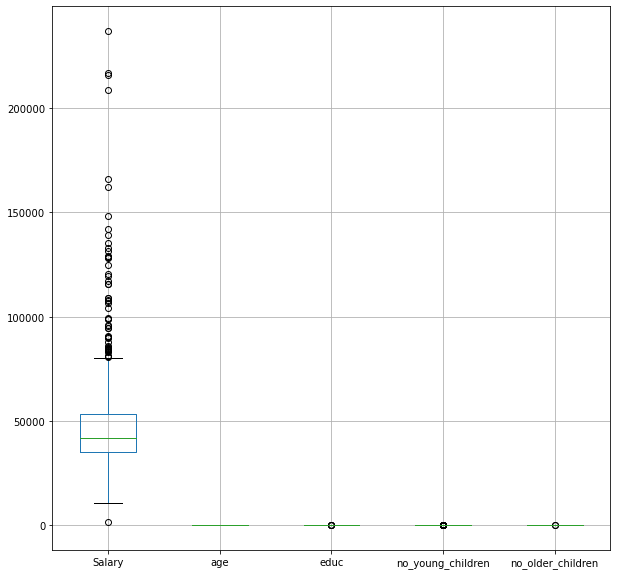

In [150]:
plt.figure(figsize=(10,10))
hp.boxplot()

# Univariate Analysis

(array([ 45., 537., 204.,  54.,  13.,  12.,   3.,   0.,   1.,   3.]),
 array([  1322. ,  24885.9,  48449.8,  72013.7,  95577.6, 119141.5,
        142705.4, 166269.3, 189833.2, 213397.1, 236961. ]),
 <a list of 10 Patch objects>)

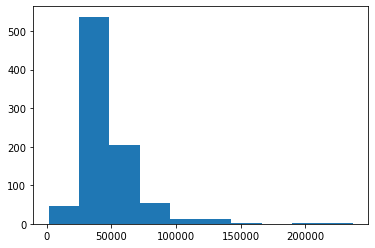

In [151]:
plt.hist(hp['Salary'])

(array([ 56.,  89.,  97., 121., 103., 129.,  93.,  66.,  67.,  51.]),
 array([20. , 24.2, 28.4, 32.6, 36.8, 41. , 45.2, 49.4, 53.6, 57.8, 62. ]),
 <a list of 10 Patch objects>)

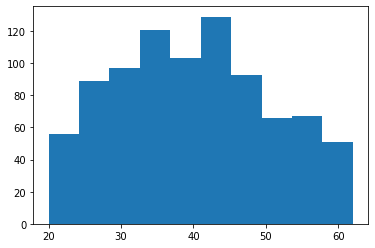

In [152]:
plt.hist(hp['age'])

(array([  7.,  61.,  88., 188., 204., 224.,  68.,  25.,   4.,   3.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

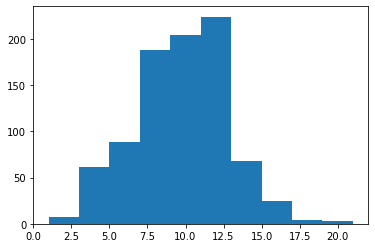

In [153]:
plt.hist(hp['educ'])

(array([665.,   0.,   0., 147.,   0.,   0.,  55.,   0.,   0.,   5.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

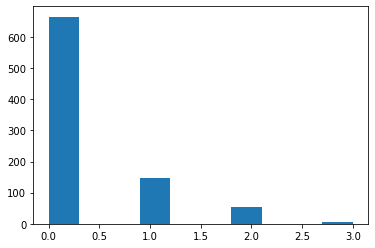

In [154]:
plt.hist(hp['no_young_children'])

(array([393., 198.,   0., 208.,   0.,  55.,  14.,   0.,   2.,   2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

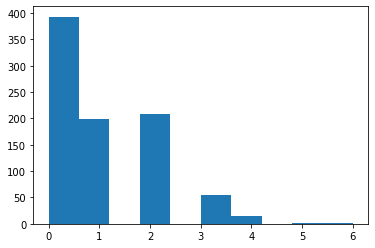

In [155]:
plt.hist(hp['no_older_children'])

# Bivariate Analysis

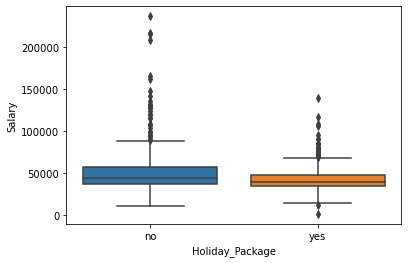

In [156]:
sns.boxplot(hp['Holiday_Package'],hp['Salary'])

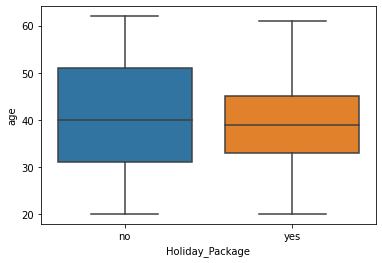

In [157]:
sns.boxplot(hp['Holiday_Package'],hp['age'])

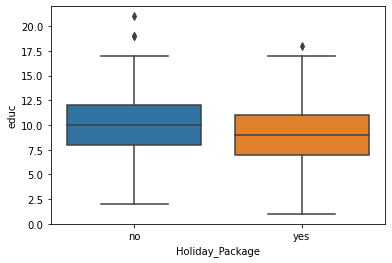

In [158]:
sns.boxplot(hp['Holiday_Package'],hp['educ'])

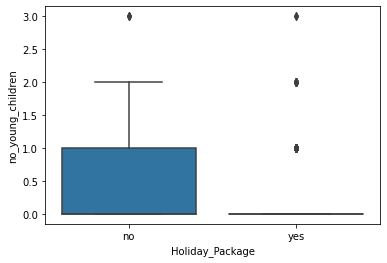

In [159]:
sns.boxplot(hp['Holiday_Package'],hp['no_young_children'])

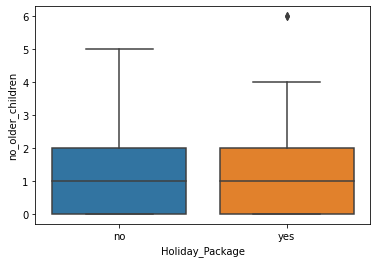

In [160]:
sns.boxplot(hp['Holiday_Package'],hp['no_older_children'])

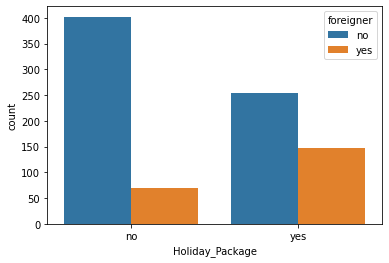

In [161]:
sns.countplot(hp['Holiday_Package'],hue=hp['foreigner'])

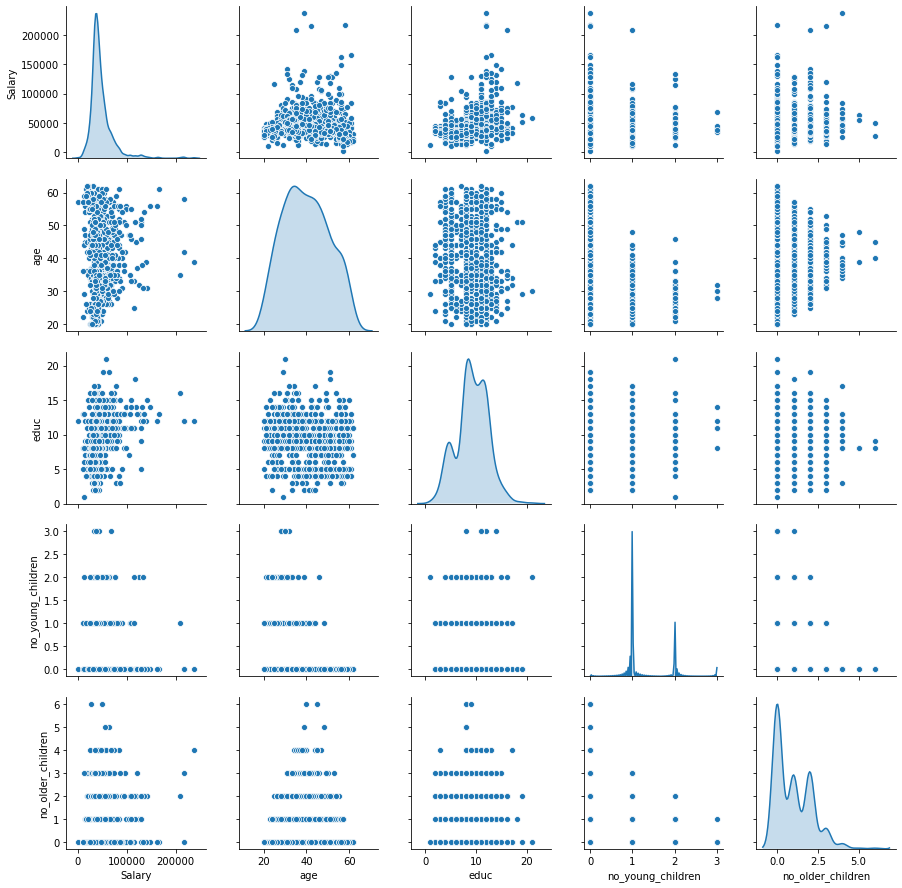

In [162]:
sns.pairplot(hp,diag_kind = 'kde')

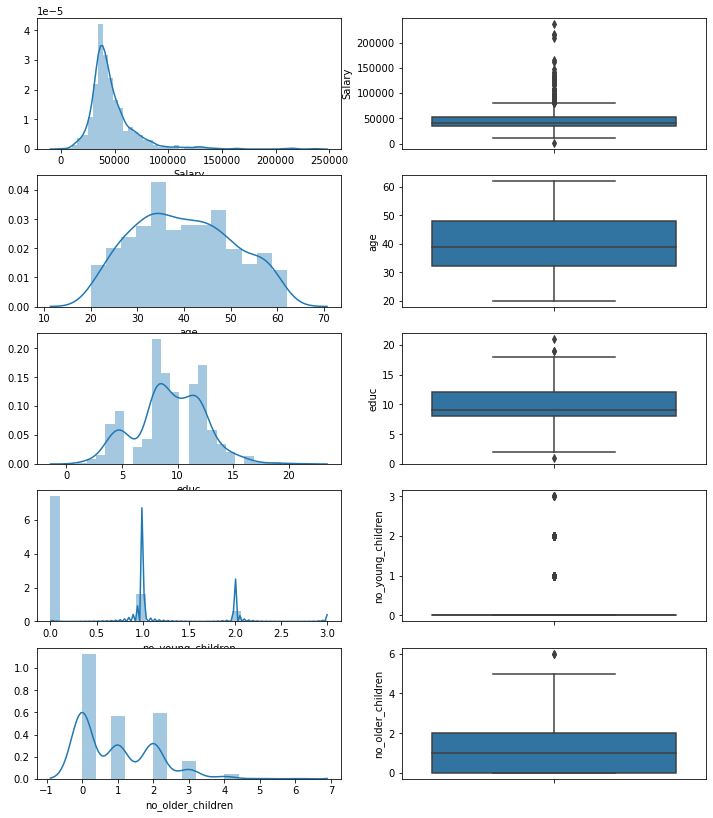

In [163]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(hp['Salary'] , ax=axes[0][0])
a = sns.boxplot(hp['Salary'] , orient = "v" , ax=axes[0][1])

a = sns.distplot(hp['age'] , ax=axes[1][0])
a = sns.boxplot(hp['age'] , orient = "v" , ax=axes[1][1])

a = sns.distplot(hp['educ'] , ax=axes[2][0])
a = sns.boxplot(hp['educ'] , orient = "v" , ax=axes[2][1])

a = sns.distplot(hp['no_young_children'] , ax=axes[3][0])
a = sns.boxplot(hp['no_young_children'] , orient = "v" , ax=axes[3][1])

a = sns.distplot(hp['no_older_children'] , ax=axes[4][0])
a = sns.boxplot(hp['no_older_children'] , orient = "v" , ax=axes[4][1])

plt.show()

In [164]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [165]:
for column in hp.columns:
    if hp[column].dtype != 'object': 
        lr,ur=remove_outlier(hp[column])
        hp[column]=np.where(hp[column]>ur,ur,hp[column])
        hp[column]=np.where(hp[column]<lr,lr,hp[column])

In [166]:
hp.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.0,872.000000
mean,45608.336869,39.955275,9.302752,0.0,0.980505
std,15699.745151,10.551675,3.014712,0.0,1.077197
min,8105.750000,20.000000,2.000000,0.0,0.000000
25%,35324.000000,32.000000,8.000000,0.0,0.000000
50%,41903.500000,39.000000,9.000000,0.0,1.000000
75%,53469.500000,48.000000,12.000000,0.0,2.000000
max,80687.750000,62.000000,18.000000,0.0,5.000000


In [167]:
hp.drop(['no_young_children'],axis=1,inplace=True)

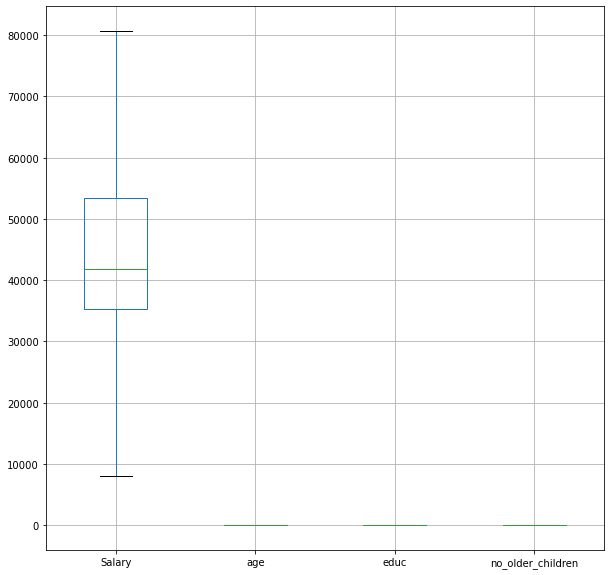

In [168]:
plt.figure(figsize=(10,10))
hp.boxplot()

In [169]:
for feature in hp.columns: 
    if hp[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(hp[feature].unique()))
        print(pd.Categorical(hp[feature].unique()).codes)
        hp[feature] = pd.Categorical(hp[feature]).codes



feature: Holiday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreigner
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [170]:
hp.head(5)

,Holiday_Package,Salary,age,educ,no_older_children,foreigner
0,0,48412.0,30.0,8.0,1.0,0
1,1,37207.0,45.0,8.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0
4,0,66734.0,44.0,12.0,2.0,0


In [171]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday_Package    872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_older_children  872 non-null    float64
 5   foreigner          872 non-null    int8   
dtypes: float64(4), int8(2)
memory usage: 29.1 KB


In [172]:
hp.groupby(['Holiday_Package']).count()

,Salary,age,educ,no_older_children,foreigner
Holiday_Package,,,,,
0,471,471,471,471,471
1,401,401,401,401,401


# Logistic Regression

In [173]:
# Copy all the predictor variables into X dataframe
X = hp.drop('Holiday_Package', axis=1)

# Copy target into the y dataframe. 
y = hp['Holiday_Package']

In [174]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=20)

In [175]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10)
model.fit(X_train, y_train)
# Fit the model on original data i.e. before upsampling
# model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='none',
                   random_state=10, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

In [176]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [177]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.772570,0.227430
1,0.744954,0.255046
2,0.547910,0.452090
3,0.591615,0.408385
4,0.726891,0.273109


In [178]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6245901639344262

AUC: 0.645


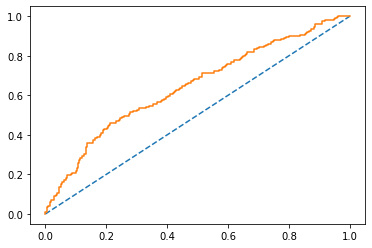

In [179]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.645


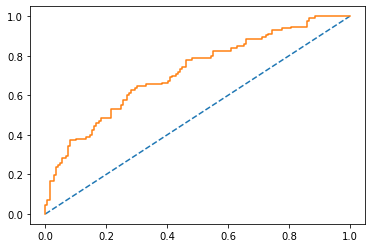

In [180]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [181]:
confusion_matrix(y_train, ytrain_predict)

array([[257,  65],
       [164, 124]], dtype=int64)

In [182]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.61      0.80      0.69       322
           1       0.66      0.43      0.52       288

    accuracy                           0.62       610
   macro avg       0.63      0.61      0.61       610
weighted avg       0.63      0.62      0.61       610



In [183]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[125,  24],
       [ 63,  50]], dtype=int64)

In [184]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.6679389312977099

In [185]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       149
           1       0.68      0.44      0.53       113

    accuracy                           0.67       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.67      0.65       262



In [186]:
# invoke the LogisticRegression function and find the bestfit model on training data

regression_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=20)
regression_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='none',
                   random_state=20, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

In [187]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Salary is -1.9066204415739324e-05
The coefficient for age is -0.008078750868179442
The coefficient for educ is 0.02712908916490557
The coefficient for no_older_children is 0.12362623445314841
The coefficient for foreigner is 0.972865522430878


# LDA

In [188]:
# Copy all the predictor variables into X dataframe
A = hp.drop('Holiday_Package', axis=1)
A = np.asmatrix(A)
# #Scale X
# X = scale(X)

# Copy target into the y dataframe. 
B = np.asarray(hp[['Holiday_Package']])

In [189]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.30 , random_state=20)

In [190]:
#Build LDA Model
clf = LinearDiscriminantAnalysis(solver='svd')
model1=clf.fit(A_train,B_train)
model1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [191]:
Btrain_predict = model1.predict(A_train)
Btest_predict = model1.predict(A_test)

In [192]:
# Accuracy - Training Data
clf.score(A_train, B_train)

0.6229508196721312

AUC: 0.644


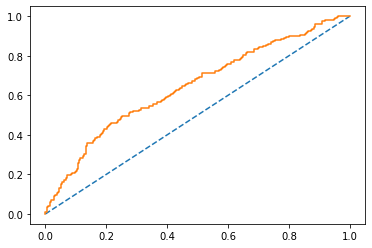

In [193]:
# predict probabilities
probs = model1.predict_proba(A_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(B_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(B_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [194]:
# Accuracy - Test Data
model1.score(A_test, B_test)

0.6641221374045801

AUC: 0.644


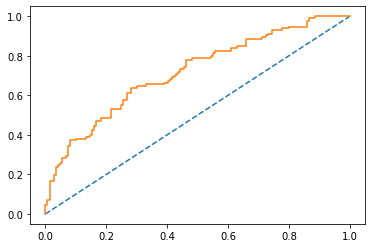

In [195]:
# predict probabilities
probs = model1.predict_proba(A_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(B_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(B_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [196]:
confusion_matrix(B_train, Btrain_predict)

array([[261,  61],
       [169, 119]], dtype=int64)

In [197]:
print(classification_report(B_train, Btrain_predict))

              precision    recall  f1-score   support

           0       0.61      0.81      0.69       322
           1       0.66      0.41      0.51       288

    accuracy                           0.62       610
   macro avg       0.63      0.61      0.60       610
weighted avg       0.63      0.62      0.61       610



In [198]:
cnf_matrix=confusion_matrix(B_test, Btest_predict)
cnf_matrix

array([[126,  23],
       [ 65,  48]], dtype=int64)

In [199]:
#Test Data Accuracy
test_acc=model1.score(A_test,B_test)
test_acc

0.6641221374045801

In [200]:
print(classification_report(B_test, Btest_predict))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       149
           1       0.68      0.42      0.52       113

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.67      0.66      0.65       262



In [201]:
# Predict it
pred_class = model1.predict(A)
hp['Prediction'] = pred_class 
hp.head()

,Holiday_Package,Salary,age,educ,no_older_children,foreigner,Prediction
0,0,48412.0,30.0,8.0,1.0,0,0
1,1,37207.0,45.0,8.0,1.0,0,0
2,0,58022.0,46.0,9.0,0.0,0,0
3,0,66503.0,31.0,11.0,0.0,0,0
4,0,66734.0,44.0,12.0,2.0,0,0


In [202]:
#generate Confusion Matrix
confusion_matrix(B, pred_class)

array([[387,  84],
       [234, 167]], dtype=int64)

In [203]:
model1.score(A,B)

0.6353211009174312

In [204]:
from sklearn.metrics import classification_report
print(classification_report(B, pred_class))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       471
           1       0.67      0.42      0.51       401

    accuracy                           0.64       872
   macro avg       0.64      0.62      0.61       872
weighted avg       0.64      0.64      0.62       872



Logistic regression yields a slightly better result than LDA